# IS6061 Python for Business Analytics
## Group 17

Sajin Siyad 			      - 124104640    <br>
Chinmayi Budanur Siddaramaiah - 124103125    <br>
Hanna Mariyam Jacob           - 124104737    <br>
Edwin Dominic Joseph          - 124105961    <br>
Aditya Gusain                 - 124117257    <br>

Pandas, Numpy, Seaborn and Matplotlib libraries are imported to be used throughout the project.  (Pandas, 2014)(NumPy, 2022)(Matplotlib, n.d.)(Waskom, n.d.)(Python for Data Analysis, 2022)


The files 'quarterly_waste_generation' and 'quarterly_waste_treatment' are accessed and stored into DataFrames named 'df_waste_generation' and 'df_waste_treatment', respectively, using the `read_csv()` function. The `.info()` function is then used to display the column names, the total count of entries, the count of non-null values, and the data types of each column in the DataFrames. These steps allowed for an assessment of the structure and integrity of the data. 

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_waste_generation = pd.read_csv(r'C:\Users\Sajin Siyad\Documents\Saju\UCC\IS6061\project\IS6061_project_data\quarterly_waste_generation.csv')
df_waste_treatment = pd.read_csv(r'C:\Users\Sajin Siyad\Documents\Saju\UCC\IS6061\project\IS6061_project_data\quarterly_waste_treatment.csv')


df_waste_generation.info()
df_waste_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Quarter                18657 non-null  object
 1   County                 18985 non-null  object
 2   Waste Type             18640 non-null  object
 3   Waste Category         19217 non-null  object
 4   Waste Amount (tonnes)  18632 non-null  object
dtypes: object(5)
memory usage: 767.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45864 entries, 0 to 45863
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Quarter                           43521 non-null  object
 1   County                            43573 non-null  object
 2   Waste Type                        43568 non-null  object
 3   Waste Category                    44757 non-null  object
 4   Treatmen

Distinct values for each column in the data frames are observed to identify the diversity of values in each column of the two dataframes using `.unique()` function

In [331]:
print('For df_waste_generation')
for column in df_waste_generation.columns:
    print(f"Unique values in column '{column}':")
    print(df_waste_generation[column].unique())
    print("\n")

print('for df_waste_treatment')
for column in df_waste_treatment.columns:
    print(f"Unique values in column '{column}':")
    print(df_waste_treatment[column].unique())
    print("\n")  

For df_waste_generation
Unique values in column 'Quarter':
['2004 Q4' '01-01-2004' 'Q1 2004' '2004Q1' '01-Jan-04' '2004 Q1' nan
 '2004 Q2' 'January 01, 2004' 'Q2 2004' '2004 Q3' 'Q4 2004' '2004Q2'
 '01-Apr-04' '01-04-2004' 'April 01, 2004' 'Q3 2004' '2004Q3'
 'July 01, 2004' '01-07-2004' '01-Jul-04' '01-10-2004' '2004Q4'
 '01-Oct-04' 'October 01, 2004' '2005Q1' '01-01-2005' 'January 01, 2005'
 '01-Jan-05' '2005 Q4' '2005 Q1' '2005 Q2' 'Q4 2005' 'Q3 2005' 'Q2 2005'
 'Q1 2005' '2005Q2' '01-04-2005' 'April 01, 2005' '01-Apr-05' '2005 Q3'
 '01-Jul-05' '2005Q3' '01-07-2005' 'July 01, 2005' '2005Q4' '01-10-2005'
 'October 01, 2005' '01-Oct-05' '01-01-2006' '01-Jan-06' '2006Q1'
 'January 01, 2006' '2006 Q4' 'Q2 2006' 'Q1 2006' 'Q4 2006' 'Q3 2006'
 '2006 Q2' '2006 Q3' '01-04-2006' 'April 01, 2006' '2006Q2' '01-Apr-06'
 '2006 Q1' '01-07-2006' '2006Q3' 'July 01, 2006' '01-Jul-06' '2006Q4'
 '01-10-2006' 'October 01, 2006' '01-Oct-06' '01-01-2007' '2007 Q1'
 '2007Q1' '01-Jan-07' '2007 Q3' 'January

## Data Cleaning and Processing                                                                               
                                                                                                        (Sahoo et al., 2019)


### Standardizing the dataset for further analysis: 

The 'Quarter' column is observed to have quarter and year together in various formats. The following code transforms all the entries of the column into a standard form of quarter followed by year separated by an underscore(e.g., Q2_2004). This is achieved using the clean_quarter() function. Missing values in the column are converted to strings named 'Unknown'. These changes are then observed using the `.unique()` function.

In [335]:
# cleaning of quarter logic

# Function to clean and standardize the 'Quarter' column
def clean_quarter(quarter_value):
    if pd.isna(quarter_value) or quarter_value == '':
        return 'Unknown'  # Handle missing or empty values
    
    try:
        # Case 1: If the value is a date-like string (e.g., '01-01-2004', '01/01/2004')
        date_value = pd.to_datetime(quarter_value, errors='coerce', dayfirst=True)
        if pd.notna(date_value):
            quarter = f"Q{(date_value.month - 1) // 3 + 1}"
            year = date_value.year
            return f"{quarter}_{year}"
    except Exception as e:
        pass
    
    # Case 2: If the value contains 'Q' (Quarter), we process different formats
    quarter_value = quarter_value.strip()  # Remove extra spaces around the string
    
    # Case 2a: If the value contains 'Q' (either 'Q1 2004' or '2004 Q1')
    if 'Q' in quarter_value:
        # Split by 'Q' and handle cases like '2004 Q4' or 'Q1 2004'
        parts = quarter_value.split('Q')
        
        # Case 2a1: Format like '2004 Q4' or '2020 Q3' (year first, quarter second)
        if len(parts) == 2:
            year_part = parts[0].strip()  # Extract the year part
            quarter_part = parts[1].strip()  # Extract the quarter part
            
            if quarter_part.isdigit() and len(quarter_part) in [1, 2]:
                # Correct quarter format and valid quarter number (1, 2, 3, 4)
                quarter = f"Q{quarter_part}"
                return f"{quarter}_{year_part}"
        
        # Case 2a2: Format like 'Q1 2004' or 'Q3 2023' (quarter first, year second)   
        if len(parts) == 2 and parts[1][2:].isdigit():
           
            # Split the string by the space
            parts = parts[1].split()

            quarter_part = parts[0]  # Extract the quarter part (after 'Q')
            year_part = parts[1].strip()  # Extract the year part
            if quarter_part.isdigit() and len(quarter_part) in [1, 2]:
                # Correct quarter format and valid quarter number (1, 2, 3, 4)
                quarter = f"Q{quarter_part}"
                return f"{quarter}_{year_part}"
    
    # Case 2b: If the value is like '2004Q' or 'Q1 2004' (special cases like '2004Q' or 'Q1 2004')
    if quarter_value[-1] == 'Q':  # Check if it ends with 'Q' (e.g., '2004Q')
        year_part = quarter_value[:-1].strip()  # Extract year before 'Q'
        return f"Q4_{year_part}"  # Assuming it's Q4 based on common format
    
    return 'Unknown'

# Apply the cleaning function to the 'Quarter' column of df_waste_generation
df_waste_generation['Quarter'] = df_waste_generation['Quarter'].apply(clean_quarter)
df_waste_generation['Quarter'].unique()

array(['Q4_2004', 'Q1_2004', 'Unknown', 'Q2_2004', 'Q3_2004', 'Q1_2005',
       'Q4_2005', 'Q2_2005', 'Q3_2005', 'Q1_2006', 'Q4_2006', 'Q2_2006',
       'Q3_2006', 'Q1_2007', 'Q3_2007', 'Q4_2007', 'Q2_2007', 'Q1_2008',
       'Q2_2008', 'Q4_2008', 'Q3_2008', 'Q4_2009', 'Q1_2009', 'Q2_2009',
       'Q3_2009', 'Q1_2010', 'Q3_2010', 'Q4_2010', 'Q2_2010', 'Q1_2011',
       'Q3_2011', 'Q4_2011', 'Q2_2011', 'Q1_2012', 'Q2_2012', 'Q4_2012',
       'Q3_2012', 'Q2_2013', 'Q1_2013', 'Q3_2013', 'Q4_2013', 'Q4_2014',
       'Q1_2014', 'Q3_2014', 'Q2_2014', 'Q1_2015', 'Q3_2015', 'Q2_2015',
       'Q4_2015', 'Q1_2016', 'Q3_2016', 'Q4_2016', 'Q2_2016', 'Q4_2017',
       'Q1_2017', 'Q2_2017', 'Q3_2017', 'Q1_2018', 'Q4_2018', 'Q3_2018',
       'Q2_2018', 'Q2_2019', 'Q1_2019', 'Q4_2019', 'Q3_2019', 'Q1_2020',
       'Q4_2020', 'Q3_2020', 'Q2_2020', 'Q3_2021', 'Q1_2021', 'Q2_2021',
       'Q4_2021', 'Q1_2022', 'Q4_2022', 'Q3_2022', 'Q2_2022', 'Q2_2023',
       'Q1_2023', 'Q3_2023', 'Q4_2023', 'Q1_2024', 

In [336]:
# Apply the cleaning function to the 'Quarter' column of df_waste_treatment
df_waste_treatment['Quarter'] = df_waste_treatment['Quarter'].apply(clean_quarter)
df_waste_treatment['Quarter'].unique()

array(['Q1_2004', 'Q4_2004', 'Unknown', 'Q2_2004', 'Q3_2004', 'Q1_2005',
       'Q4_2005', 'Q2_2005', 'Q3_2005', 'Q1_2006', 'Q4_2006', 'Q3_2006',
       'Q2_2006', 'Q1_2007', 'Q2_2007', 'Q3_2007', 'Q4_2007', 'Q1_2008',
       'Q2_2008', 'Q4_2008', 'Q3_2008', 'Q1_2009', 'Q3_2009', 'Q2_2009',
       'Q4_2009', 'Q1_2010', 'Q3_2010', 'Q4_2010', 'Q2_2010', 'Q1_2011',
       'Q2_2011', 'Q4_2011', 'Q3_2011', 'Q1_2012', 'Q2_2012', 'Q3_2012',
       'Q4_2012', 'Q1_2013', 'Q2_2013', 'Q3_2013', 'Q4_2013', 'Q1_2014',
       'Q2_2014', 'Q4_2014', 'Q3_2014', 'Q1_2015', 'Q4_2015', 'Q3_2015',
       'Q2_2015', 'Q1_2016', 'Q3_2016', 'Q2_2016', 'Q4_2016', 'Q1_2017',
       'Q4_2017', 'Q2_2017', 'Q3_2017', 'Q1_2018', 'Q4_2018', 'Q3_2018',
       'Q2_2018', 'Q2_2019', 'Q1_2019', 'Q4_2019', 'Q3_2019', 'Q1_2020',
       'Q2_2020', 'Q3_2020', 'Q4_2020', 'Q1_2021', 'Q2_2021', 'Q3_2021',
       'Q4_2021', 'Q1_2022', 'Q2_2022', 'Q4_2022', 'Q3_2022', 'Q1_2023',
       'Q2_2023', 'Q3_2023', 'Q4_2023', 'Q1_2024', 

Similarly, categorical columns like 'County' and 'Waste Category' are cleaned using clean_text() to ensure all entries are in title case to avoid redundancy and to preserve data integrity.

In [338]:
# cleaning of County logic

# General cleaning function
def clean_text(text):

    if pd.isna(text) or text == '':
        return 'Unknown'  # Handle missing or empty values
    # Replacing co. with Co. 
    text = text.replace('co.', '').replace('Co.', '')  # Removes Co. 
    text = text.replace('County', '').replace('county', '')  # Removes county
    # Strip any leading/trailing spaces
    text = text.strip()
   

    text = text.title()
    return text

# Apply the cleaning function to the County column of df_waste_generation
df_waste_generation['County'] = df_waste_generation['County'].apply(clean_text)
unique_county_generation = df_waste_generation['County'].unique()
print("Unique values of County in df_waste_generation :", unique_county_generation)
print('\n')

# Apply the cleaning function to the County column of df_waste_treatment 
df_waste_treatment['County'] = df_waste_treatment['County'].apply(clean_text)
unique_county_treatment = df_waste_treatment['County'].unique()
print("Unique values of County in df_waste_treatment :", unique_county_treatment)

Unique values of County in df_waste_generation : ['Antrim' 'Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Down' 'Dublin'
 'Galway' 'Kerry' 'Kildare' 'Kilkenny' 'Unknown' 'Laois' 'Limerick'
 'Louth' 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Nan' 'Roscommon' 'Sligo'
 'Tipperary' 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']


Unique values of County in df_waste_treatment : ['Antrim' 'Carlow' 'Cavan' 'Unknown' 'Clare' 'Cork' 'Donegal' 'Down'
 'Dublin' 'Galway' 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Limerick' 'Louth'
 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo' 'Tipperary'
 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']


In [339]:
# cleaning of waste category logic 
# General cleaning function
def clean_text(text):
    if pd.isna(text) or text == '' or text == '':
        return 'Unknown'  # Handle missing or empty values
    # Remove underscores
    text = text.replace('_', ' ')
    text = text.replace('.', ' ')# Removes underscores by replacing them with space
    # Strip any leading/trailing spaces
    text = text.strip()
    if text.__contains__("  "):
        textlist = text.split("  ")
        temp = [x.replace(" ","") for x in textlist]
        text = ' '.join(temp)
    text = text.title()
    if 'Waste' in text:
        temp = text.replace('Waste','')
        text = temp.strip() + ' Waste'
    if 'Electronic' in text:
        text = 'Electronic Waste'
    if 'Construction' in text:
        text = 'Construction and Demolition Waste'
    if 'Municipal' in text:
        text = 'Municipal Solid Waste'
    return text

# Apply the cleaning function to the waste category of df_waste_generation
df_waste_generation['Waste Category'] = df_waste_generation['Waste Category'].apply(clean_text)
unique_category_generation = df_waste_generation['Waste Category'].unique()
print("Unique values of Waste Category in df_waste_generation :", unique_category_generation)
print('\n')

# Apply the cleaning function to the waste category of df_waste_treatment
df_waste_treatment['Waste Category'] = df_waste_treatment['Waste Category'].apply(clean_text)
unique_category_treatment = df_waste_treatment['Waste Category'].unique()
print("Unique values of Waste Category in df_waste_treatment :", unique_category_treatment)


Unique values of Waste Category in df_waste_generation : ['Chemical Waste' 'Electronic Waste' 'Industrial Hazardous Waste'
 'Medical Waste' 'Agricultural Waste' 'Construction and Demolition Waste'
 'Industrial Non-Hazardous Waste' 'Municipal Solid Waste' 'Organic Waste'
 'Nan' 'Industrial  Non-Hazardous Waste' 'Unknown'
 'Non-Hazardous Industrial Waste' 'N A N' 'Hazardous  Industrial Waste'
 'Industrial  Hazardous Waste' 'Hazardous Industrial Waste'
 'Non-Hazardous  Industrial Waste']


Unique values of Waste Category in df_waste_treatment : ['Chemical Waste' 'Electronic Waste' 'Industrial Hazardous Waste'
 'Medical Waste' 'Agricultural Waste' 'Construction and Demolition Waste'
 'Industrial Non-Hazardous Waste' 'Municipal Solid Waste' 'Unknown'
 'Organic Waste' 'Nan' 'Industrial  Non-Hazardous Waste'
 'Non-Hazardous Industrial Waste' 'N A N'
 'Non-Hazardous  Industrial Waste' 'Hazardous  Industrial Waste'
 'Industrial  Hazardous Waste' 'Hazardous Industrial Waste']


The 'Treatment Method' column is cleaned by handling missing or empty values into strings called 'Unknown', removing underscores and periods, trimming extra spaces, and converting the text to title case. 

In [341]:
# cleaning of Treatment Method logic

# General cleaning function
def clean_text(text):
    if pd.isna(text) or text == '':  # Handle missing or empty values
        return 'Unknown'  
    # Removes underscores by replacing them with space
    text = text.replace('_', ' ')
    text = text.replace('.', ' ') 
    # Strip any leading/trailing spaces
    text = text.strip()
    if text.__contains__("  "):
        textlist = text.split("  ")
        temp = [x.replace(" ","") for x in textlist]
        text = ' '.join(temp)
    # Capitalize the first letter of each word (Title Case)
    text = text.title()   
    if 'Disposal' in text:  
        temp = text.replace('-','').replace('Disposal','')
        text = 'Disposal - ' + temp.strip()
    if 'Energy' in text:
        text =  'Recovery - Energy Recovery'
    if 'Composting' in text:
        text =  'Recovery - Composting Recovery'
    if 'Recycling' in text:
        text =  'Recovery - Recycling'
    return text

# Apply the cleaning function to the treatment method
df_waste_treatment['Treatment Method'] = df_waste_treatment['Treatment Method'].apply(clean_text)
unique_treat_treatment = df_waste_treatment['Treatment Method'].unique()
print("Unique values of Treatment Method in df_waste_treatment :", unique_treat_treatment)



Unique values of Treatment Method in df_waste_treatment : ['Disposal - Incineration' 'Disposal - Other' 'Recovery - Recycling'
 'Disposal - Landfill' 'Recovery - Composting Recovery'
 'Recovery - Energy Recovery' 'Unknown' '#Name?' 'N A N' 'Nan']


The 'Price of Treatment (€ per tonne)' column was cleaned and renamed to "Price of Treatment (euro per tonne)" for clarity and consistency. A custom function was applied to extract the numeric portion of each value, convert it to a float, and round it to two decimal places. This ensured that numeric values were standardized for analysis. For instance, "255.40 € tonne" was transformed to 255.40.

In [343]:
# cleaning of Price of Treatment (€ per tonne) logic
# Price of Treatment (€ per tonne) -> Price of Treatment (€ per tonne)_new (upto 2 decimal points)
def extract_price(price):
    parts = price.split()
    
    for part in parts:
            return round(float(part), 2)

df_waste_treatment = df_waste_treatment.rename(columns={'Price of Treatment (€ per tonne)': 'Price of Treatment (euro per tonne)'})
df_waste_treatment['Price of Treatment (euro per tonne)'] = df_waste_treatment['Price of Treatment (euro per tonne)'].apply(extract_price)
df_waste_treatment.head(20)

,Quarter,County,Waste Type,Waste Category,Treatment Method,Waste Amount (tonnes),Price of Treatment (euro per tonne)
0,Q1_2004,Antrim,Hazardous,Chemical Waste,Disposal - Incineration,9813.86 tonnes,348.26
1,Q1_2004,Antrim,Hazardous,Chemical Waste,Disposal - Other,4205.94,255.40
2,Q1_2004,Antrim,Hazardous,Electronic Waste,Recovery - Recycling,14926.92,69.00
3,Q4_2004,Antrim,Hazardous,Electronic Waste,Disposal - Other,1658.55,152.09
4,Unknown,Antrim,Hazardous,Industrial Hazardous Waste,Disposal - Incineration,"12,078",59.21
5,Q1_2004,Antrim,Hazardous,Industrial Hazardous Waste,Disposal - Other,8052.58,69.79
6,Q1_2004,Antrim,Hazardous,Medical Waste,Disposal - Incineration,NaN,67.25
7,Q1_2004,Antrim,Hazardous,Medical Waste,Disposal - Other,3023.5,66.11
8,Q4_2004,Antrim,Non-Hazardous,Agricultural Waste,Disposal - Landfill,4311.98,70.73
9,Q1_2004,Antrim,Non-Hazardous,Agricultural Waste,Recovery - Composting Recovery,4311.98,66.70


The 'Waste Amount (tonnes)' column in both df_waste_generation and df_waste_treatmentda tasets was cleaned to make the data consistent and easy to work with. A custom function was used to handle different formats of the data. If the value was already a number, it was simply rounded to two decimal places. For text values, the function removed any commas, extracted the number, converted it to a float, and rounded it. This process was applied to every entry in the column, ensuring all the data is now clean, standardized, and ready for analysis.

In [345]:
# cleaning of waste amount logic
def extract_price(price):
    parts = price.split()   
    for part in parts:
            return round(float(part), 2)

# Waste Amount (tonnes) -> Waste Amount (tonnes)_new (upto 2 decimal points)
def extract_price(price):
    if isinstance(price, float):
        return round(price, 2)
    parts = price.split()
    for part in parts:
            return round(float(part.replace(',', '')), 2) 

# Apply the cleaning function to the Waste Amount of df_waste_generation
df_waste_generation['Waste Amount (tonnes)'] = df_waste_generation['Waste Amount (tonnes)'].apply(extract_price)
df_waste_generation.head(10)

,Quarter,County,Waste Type,Waste Category,Waste Amount (tonnes)
0,Q4_2004,Antrim,Hazardous,Chemical Waste,14019.80
1,Q1_2004,Antrim,Hazardous,Electronic Waste,16585.47
2,Q1_2004,Antrim,Hazardous,Industrial Hazardous Waste,20131.46
3,Q1_2004,Antrim,Hazardous,Medical Waste,NaN
4,Q1_2004,Antrim,Non-Hazardous,Agricultural Waste,10779.94
5,Q1_2004,Antrim,Non-Hazardous,Construction and Demolition Waste,13516.83
6,Q1_2004,Antrim,Non-Hazardous,Industrial Non-Hazardous Waste,27502.64
7,Q1_2004,Antrim,Non-Hazardous,Municipal Solid Waste,15975.40
8,Unknown,Antrim,Non-Hazardous,Organic Waste,12209.00
9,Unknown,Carlow,Hazardous,Chemical Waste,26329.67


In [346]:
# Apply the cleaning function to the Waste Amount of df_waste_treatment
df_waste_treatment['Waste Amount (tonnes)'] = df_waste_treatment['Waste Amount (tonnes)'].apply(extract_price)
df_waste_treatment.head(20)

,Quarter,County,Waste Type,Waste Category,Treatment Method,Waste Amount (tonnes),Price of Treatment (euro per tonne)
0,Q1_2004,Antrim,Hazardous,Chemical Waste,Disposal - Incineration,9813.86,348.26
1,Q1_2004,Antrim,Hazardous,Chemical Waste,Disposal - Other,4205.94,255.40
2,Q1_2004,Antrim,Hazardous,Electronic Waste,Recovery - Recycling,14926.92,69.00
3,Q4_2004,Antrim,Hazardous,Electronic Waste,Disposal - Other,1658.55,152.09
4,Unknown,Antrim,Hazardous,Industrial Hazardous Waste,Disposal - Incineration,12078.00,59.21
5,Q1_2004,Antrim,Hazardous,Industrial Hazardous Waste,Disposal - Other,8052.58,69.79
6,Q1_2004,Antrim,Hazardous,Medical Waste,Disposal - Incineration,NaN,67.25
7,Q1_2004,Antrim,Hazardous,Medical Waste,Disposal - Other,3023.50,66.11
8,Q4_2004,Antrim,Non-Hazardous,Agricultural Waste,Disposal - Landfill,4311.98,70.73
9,Q1_2004,Antrim,Non-Hazardous,Agricultural Waste,Recovery - Composting Recovery,4311.98,66.70


### Merging the Datasets and Splitting into Relevant Columns
The column 'Waste Amount (tonnes)' in the DataFrames 'df_waste_treatment' is changed to 'Waste Treated (tonnes)', and in 'df_waste_generation', it is renamed to 'Waste Generated (tonnes)' to reflect the different contexts of waste treatment and generation. This ensures clarity and consistency in naming across the datasets.

The code below merges the two datasets, 'df_waste_generation' and 'df_waste_treatment', on common columns: 'Waste Category', 'Quarter', 'County', and 'Waste Type', using an outer join to ensure no data is lost. It then splits the 'Quarter' column into two new columns: 'Quarter' and 'Year', based on an underscore delimiter. Missing or empty values in the 'Year' column are replaced with 'Unknown'.The 'Treatment Method' is then split into two new columns: 'Treatment Type' and 'Treatment Mode' and the columns are reordered for better clarity. 
Finally, the columns are reordered for better clarity, and the cleaned and merged dataset is displayed. 

In [348]:
# changing column names. Waste Amount in generation to Waste Generated (tonnes) and Waste Amount in treatment to Waste Treated (tonnes)
df_waste_treatment = df_waste_treatment.rename(columns={'Waste Amount (tonnes)': 'Waste Treated (tonnes)'})
df_waste_generation = df_waste_generation.rename(columns={'Waste Amount (tonnes)': 'Waste Generated (tonnes)'})


# to merge the datasets
merged_data = pd.merge(df_waste_generation, df_waste_treatment, on=['Waste Category', 'Quarter', 'County', 'Waste Type'], how='outer')

# Splitting Quarter into 2 new columns
merged_data[['Quarter', 'Year']] = merged_data['Quarter'].str.split('_', expand = True)

# Splitting Treatment Method into 2 new columns
merged_data[['Treatment Type', 'Treatment Mode']] = merged_data['Treatment Method'].str.split('-', expand = True)


# Reordering the columns
merged_data = merged_data[['Quarter','Year','County', 'Waste Type', 'Waste Category', 'Treatment Type', 'Treatment Mode' ,'Waste Generated (tonnes)', 'Waste Treated (tonnes)', 'Price of Treatment (euro per tonne)']]
merged_data['Year'] = merged_data['Year'].apply(lambda x : 'Unknown' if pd.isna(x) or x == '' else x)# Handle missing or empty values
merged_data.head(20)

,Quarter,Year,County,Waste Type,Waste Category,Treatment Type,Treatment Mode,Waste Generated (tonnes),Waste Treated (tonnes),Price of Treatment (euro per tonne)
0,Q1,2004,Antrim,Non-Hazardous,Agricultural Waste,Recovery,Composting Recovery,10779.94,4311.98,66.70
1,Q1,2004,Antrim,Non-Hazardous,Agricultural Waste,Disposal,Other,10779.94,2155.99,57.50
2,Q1,2004,Carlow,Non-Hazardous,Agricultural Waste,Disposal,Landfill,NaN,6001.94,72.30
3,Q1,2004,Carlow,Non-Hazardous,Agricultural Waste,Disposal,Other,NaN,3000.97,30.01
4,Q1,2004,Cavan,Non-Hazardous,Agricultural Waste,Disposal,Landfill,14205.93,5682.00,68.47
5,Q1,2004,Cavan,Non-Hazardous,Agricultural Waste,Recovery,Composting Recovery,14205.93,5682.37,38.29
6,Q1,2004,Cavan,Non-Hazardous,Agricultural Waste,Disposal,Other,14205.93,2841.19,51.00
7,Q1,2004,Clare,Non-Hazardous,Agricultural Waste,Disposal,Landfill,13899.53,5559.81,75.50
8,Q1,2004,Clare,Non-Hazardous,Agricultural Waste,Recovery,Composting Recovery,13899.53,5559.81,41.09
9,Q1,2004,Clare,Non-Hazardous,Agricultural Waste,Disposal,Other,13899.53,2779.91,40.00


## Handling Missing Values: By Imputation

The dataset was grouped by 'Waste Category' to collect the unique 'Waste Type' associated with each category. This grouping provided a clear overview of the relationship between waste categories and their corresponding types. Based on the observed patterns, a mapping dictionary was created to impute missing values in the 'Waste Type' column. The values were then imputed using clean(). For example, categories like "Agricultural Waste" and "Municipal Solid Waste" were associated with "Non-Hazardous," while "Chemical Waste" and "Medical Waste" were mapped to "Hazardous." 
However, for some entries in the 'Waste Category' column namely 'Industrial Waste', the hazard status (whether hazardous or non-hazardous) was explicitly mentioned within the category name. In such cases, the Waste Type was directly extracted from the category itself. The inclusion of \xa0 (non-breaking space) in the dataset cleaning process was critical for ensuring that data inconsistencies caused by hidden or irregular whitespace characters were addressed. 
This approach ensured consistent and meaningful imputation of missing data.(ivanleoncz, 2020)


In [351]:
# Group by Waste_Category and collect unique Waste_Types
grouped_data = merged_data.groupby('Waste Category')['Waste Type'].unique()

# Convert to a DataFrame for better viewing
grouped_data = grouped_data.reset_index()
print(grouped_data)


                       Waste Category                       Waste Type
0                  Agricultural Waste             [Non-Hazardous, nan]
1                      Chemical Waste                 [Hazardous, nan]
2   Construction and Demolition Waste             [Non-Hazardous, nan]
3                    Electronic Waste                 [Hazardous, nan]
4         Hazardous  Industrial Waste                 [Hazardous, nan]
5          Hazardous Industrial Waste                 [Hazardous, nan]
6         Industrial  Hazardous Waste                 [Hazardous, nan]
7     Industrial  Non-Hazardous Waste             [Non-Hazardous, nan]
8          Industrial Hazardous Waste                 [Hazardous, nan]
9      Industrial Non-Hazardous Waste             [Non-Hazardous, nan]
10                      Medical Waste                 [Hazardous, nan]
11              Municipal Solid Waste             [Non-Hazardous, nan]
12                              N A N  [Non-Hazardous, Hazardous, nan]
13    

In [352]:
# Replace multiple spaces with a single space for waste category
merged_data['Waste Category'] = merged_data['Waste Category'].replace(r'\s+', ' ', regex=True)
# For rows where "Waste Category" is "Industrial Hazardous Waste", set "Waste Type" to "Hazardous" and "Waste Category" to "Industrial Waste"
merged_data.loc[merged_data['Waste Category'].isin(['Industrial Hazardous Waste','Hazardous Industrial Waste']), ['Waste Type', 'Waste Category']] = ['Hazardous', 'Industrial Waste']
# For rows where "Waste Category" is "Industrial Non-Hazardous Waste", set "Waste Type" to "Non- Hazardous" and "Waste Category" to "Industrial Waste"
merged_data.loc[merged_data['Waste Category'].isin(['Industrial Non-Hazardous Waste','Non-Hazardous Industrial Waste']), ['Waste Type', 'Waste Category']] = ['Non-Hazardous', 'Industrial Waste']
# Replace non-breaking spaces with regular spaces
merged_data['Waste Category'] = merged_data['Waste Category'].str.replace('\xa0', ' ', regex=False)

def clean(df):
    # Dictionary for mapping Waste Category to Waste Type
    category_to_type = {
        'Agricultural Waste': 'Non-Hazardous',
        'Chemical Waste': 'Hazardous',
        'Construction and Demolition Waste': 'Non-Hazardous',
        'Electronic Waste': 'Hazardous',
        'Medical Waste': 'Hazardous',
        'Municipal Solid Waste': 'Non-Hazardous',
        'Organic Waste': 'Non-Hazardous'
    }
    # Apply the mapping
    for category, waste_type in category_to_type.items():
        df.loc[df['Waste Category'] == category, 'Waste Type'] = waste_type


clean(merged_data)


The code renames several columns in the merged dataset to replace spaces with underscores, ensuring consistency and clarity. This renaming helps prevent errors that could occur when using dot notation, as column names with spaces can cause issues in accessing or modifying the data. The first few rows of the updated dataset are then displayed.

In [354]:
# change column names
merged_data.rename(columns={"Waste Type":"Waste_Type"}, inplace=True)
merged_data.rename(columns={"Waste Category":"Waste_Category"}, inplace=True)
merged_data.rename(columns={"Treatment Type":"Treatment_Type"}, inplace=True)
merged_data.rename(columns={"Treatment Mode":"Treatment_Mode"}, inplace=True)
merged_data.rename(columns={"Waste Generated (tonnes)": "Waste_Generated_(tonnes)"}, inplace=True)
merged_data.rename(columns={"Waste Treated (tonnes)":"Waste_Treated_(tonnes)"}, inplace=True)
merged_data.rename(columns={"Price of Treatment (euro per tonne)":"Price_of_Treatment_(euro per tonne)"}, inplace=True)
merged_data.head()

,Quarter,Year,County,Waste_Type,Waste_Category,Treatment_Type,Treatment_Mode,Waste_Generated_(tonnes),Waste_Treated_(tonnes),Price_of_Treatment_(euro per tonne)
0,Q1,2004,Antrim,Non-Hazardous,Agricultural Waste,Recovery,Composting Recovery,10779.94,4311.98,66.70
1,Q1,2004,Antrim,Non-Hazardous,Agricultural Waste,Disposal,Other,10779.94,2155.99,57.50
2,Q1,2004,Carlow,Non-Hazardous,Agricultural Waste,Disposal,Landfill,NaN,6001.94,72.30
3,Q1,2004,Carlow,Non-Hazardous,Agricultural Waste,Disposal,Other,NaN,3000.97,30.01
4,Q1,2004,Cavan,Non-Hazardous,Agricultural Waste,Disposal,Landfill,14205.93,5682.00,68.47


Any known variations of missing values such as "nan", "N A N", and "Nan" in the 'Waste_Category','Waste_Type', 'Treatment_Type' and 'Treatment_Mode' columns are replaced with np.nan (a standardized placeholder for missing values).This ensures that missing or placeholder values in categorical columns are consistently handled by standardizing the representation of missing data and replacing them with a meaningful placeholder ('Unknown'). This helps to avoid analysis errors caused by null values and improves data consistency for further processing.

In [356]:
# Normalize known variations of 'nan' and similar placeholders in "Waste_Category"
merged_data["Waste_Category"] = merged_data["Waste_Category"].replace(["nan", "N A N", "Nan", "n a n", " N A N ", "  nan  ","#NAME?"], np.nan)

# Replace NaN (pd.NA) with "Unknown" in "Waste_Category"
merged_data["Waste_Category"] = merged_data["Waste_Category"].fillna("Unknown")

# Normalize known variations of 'nan' and similar placeholders in "Waste_Type"
merged_data["Waste_Type"] = merged_data["Waste_Type"].replace(["nan", "N A N", "Nan", "n a n", " N A N ", "  nan  "], np.nan)

# Replace NaN (pd.na) with "Unknown" in "Waste_Type"
merged_data["Waste_Type"] = merged_data["Waste_Type"].fillna("Unknown")

# Normalize known variations of 'nan' and similar placeholders in "Treatment_Type"
merged_data["Treatment_Type"] = merged_data["Treatment_Type"].replace(
    ["nan", "N A N", "Nan", "n a n", " N A N ", "  nan  ","#NAME?"], np.nan
)

# Replace NaN (pd.na) with "Unknown" in "Treatment_Type"
merged_data["Treatment_Type"] = merged_data["Treatment_Type"].fillna("Unknown")

# Normalize known variations of 'nan' and similar placeholders in "Treatment_Mode"
merged_data["Treatment_Mode"] = merged_data["Treatment_Mode"].replace(["nan", "N A N", "Nan", "n a n", " N A N ", "  nan  ",""], np.nan)

# Replace NaN (pd.na) with "Unknown" in "Waste_Category"
merged_data["Treatment_Mode"] = merged_data["Treatment_Mode"].fillna("Unknown")

uniquewaste = merged_data["Waste_Category"].unique()
print("Unique values in Waste_Category: ",uniquewaste)

uniquetype1 = merged_data["Waste_Type"].unique()
print("Unique values in Waste_Type : ",uniquetype1)

uniquetype2 = merged_data["Treatment_Type"].unique()
print("Unique values in Treatment_Type : ",uniquetype2)

uniquemode = merged_data["Treatment_Mode"].unique()
print("Unique values in Treatment_Mode : ",uniquemode)

Unique values in Waste_Category:  ['Agricultural Waste' 'Chemical Waste' 'Construction and Demolition Waste'
 'Electronic Waste' 'Industrial Waste' 'Medical Waste'
 'Municipal Solid Waste' 'Unknown' 'Organic Waste']
Unique values in Waste_Type :  ['Non-Hazardous' 'Hazardous' 'Unknown']
Unique values in Treatment_Type :  ['Recovery ' 'Disposal ' '#Name?' 'Unknown']
Unique values in Treatment_Mode :  [' Composting Recovery' ' Other' ' Landfill' 'Unknown' ' Incineration'
 ' Recycling' ' Energy Recovery']


The code removes rows from the merged dataset where both the 'Waste_Generated_(tonnes)' and 'Waste_Treated_(tonnes)' columns have null (NaN) values. These rows are excluded because they lack any usable data for analysis, making them irrelevant for further insights or calculations related to waste generation and treatment.

In [358]:
# removing rows with column values null for both generated and treated
merged_data = merged_data[~(merged_data['Waste_Generated_(tonnes)'].isna() & merged_data['Waste_Treated_(tonnes)'].isna())]

The function `.describe()` generates summary statistics for the numerical columns in the merged_data DataFrame, such as count, mean, standard deviation, minimum, and maximum values, along with the quartiles. This provides an overview of the dataset before any imputation or data transformation, helping to ensure that no drastic changes are made to the dataset during cleaning or processing. It allows for a comparison of key statistics before and after data imputation. 

In [360]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Waste_Generated_(tonnes),39211.0,1.625625e+04,1.464724e+04,989.62,11585.54,15102.0,18604.995,2.580000e+05
Waste_Treated_(tonnes),50741.0,2.890965e+45,1.897296e+47,198.00,3451.27,5493.6,8600.960,1.606816e+49
Price_of_Treatment_(euro per tonne),52472.0,9.137202e+01,9.208225e+01,20.00,56.00,64.9,74.200,5.994500e+02


The code handles missing values in three key columns of the dataset to ensure data completeness and reliability for analysis. For the 'Waste_Generated_(tonnes)' column, missing values are imputed in three steps: first, by calculating the median for groups defined by 'Quarter', 'County', and 'Waste_Category', and then by using the median for groups defined by 'County' and 'Waste_Category' for any remaining null values and finally if there are still missing values, they are replaced with the overall median of the column. This ensures that imputations are context-sensitive, leveraging data from similar categories and periods.  

Similarly, 'Waste_Treated_(tonnes)' column and 'Price_of_Treatment_(euro per tonne)' column are handled. This systematic approach preserves data integrity and prepares the dataset for detailed analysis. (LinkedIn, 2024)(Cao, 2021)(Khorana et al., 2022)


In [362]:
# Filling NaN values in 'Waste_Generated_(tonnes)'
# First, fill NaN values based on the most granular grouping
merged_data['Waste_Generated_(tonnes)'] = merged_data.groupby(['Quarter', 'Year', 'County', 'Waste_Category'])['Waste_Generated_(tonnes)'].transform(lambda x: x.fillna(round(x.median(), 2)) if x.notna().any() else x)
# Second, handle remaining NaN values at a broader grouping level
merged_data['Waste_Generated_(tonnes)'] = merged_data.groupby(['County', 'Waste_Category'])['Waste_Generated_(tonnes)'].transform(lambda x: x.fillna(round(x.median(), 2)) if x.notna().any() else x)
# Third, if any NaN values are still present, assign a global fallback (e.g., 0 or overall median)
overall_median_generated = round(merged_data['Waste_Generated_(tonnes)'].median(), 2)
merged_data['Waste_Generated_(tonnes)'] = merged_data['Waste_Generated_(tonnes)'].fillna(overall_median_generated)

# First, fill NaN values based on the most granular grouping
merged_data['Waste_Treated_(tonnes)'] = merged_data.groupby(['Quarter',  'Year', 'County', 'Waste_Category'])['Waste_Treated_(tonnes)'].transform(lambda x: x.fillna(round(x.median(), 2)) if x.notna().any() else x)
# Second, handle remaining NaN values at a broader grouping level
merged_data['Waste_Treated_(tonnes)'] = merged_data.groupby(['County', 'Waste_Category'])['Waste_Treated_(tonnes)'].transform(lambda x: x.fillna(round(x.median(), 2)) if x.notna().any() else x)
# Third, if any NaN values are still present, assign a global fallback (e.g., 0 or overall median)
overall_median_treated = round(merged_data['Waste_Treated_(tonnes)'].median(), 2)
merged_data['Waste_Treated_(tonnes)'] = merged_data['Waste_Treated_(tonnes)'].fillna(overall_median_treated)


# First, fill NaN values based on the most granular grouping
merged_data['Price_of_Treatment_(euro per tonne)'] = merged_data.groupby(['Quarter', 'Year', 'County', 'Waste_Category'])['Price_of_Treatment_(euro per tonne)'].transform(lambda x: x.fillna(round(x.median(), 2)) if x.notna().any() else x)
# Second, handle remaining NaN values at a broader grouping level
merged_data['Price_of_Treatment_(euro per tonne)'] = merged_data.groupby(['County', 'Waste_Category'])['Price_of_Treatment_(euro per tonne)'].transform(lambda x: x.fillna(round(x.median(), 2)) if x.notna().any() else x)
# Third, if any NaN values are still present, assign a global fallback (e.g., 0 or overall median)
overall_median_price = round(merged_data['Price_of_Treatment_(euro per tonne)'].median(), 2)
merged_data['Price_of_Treatment_(euro per tonne)'] = merged_data['Price_of_Treatment_(euro per tonne)'].fillna(overall_median_price)

The final verification for handling missing values is done using `isnull()`.

In [364]:
merged_data.isnull().sum()

Quarter                                0
Year                                   0
County                                 0
Waste_Type                             0
Waste_Category                         0
Treatment_Type                         0
Treatment_Mode                         0
Waste_Generated_(tonnes)               0
Waste_Treated_(tonnes)                 0
Price_of_Treatment_(euro per tonne)    0
dtype: int64

The `.describe()` is executed after the imputation process to generate summary statistics for the numerical columns in the dataset. This step is crucial to verify that the imputation has not caused any drastic changes to the dataset's statistical distribution, such as significant shifts in the mean, median, or spread. By comparing these statistics with those obtained before imputation, it ensures that the dataset remains consistent and reliable for analysis.

In [366]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Waste_Generated_(tonnes),55330.0,1.606287e+04,1.333868e+04,989.62,12354.35,15158.18,17773.0000,2.580000e+05
Waste_Treated_(tonnes),55330.0,2.984785e+45,1.908680e+47,198.00,3525.87,5515.91,8444.5325,1.606816e+49
Price_of_Treatment_(euro per tonne),55330.0,9.046678e+01,9.038369e+01,20.00,56.16,64.92,74.0000,5.994500e+02


## Handling Outliers

Boxplots for all the numeric columns in the dataset are plotted to visualize their distributions. It helps in identifying outliers, assessing the spread of data, and understanding central tendencies across all numeric fields. The plot is customized with an appropriate figure size for better visibility, a title for context, and axis labels for clarity. This step is particularly useful to inspect the dataset after cleaning and imputation, ensuring that the numeric data maintains consistency and does not contain unexpected anomalies or outliers that could affect the analysis(Aguinis et al., 2013)(Sullivan et al., 2021).


For the 'Waste_Generated_(tonnes)' column, outliers are observed in the boxplot. However, no further action is taken to remove or modify these outliers, as they are considered crucial for analysis. These outliers may provide valuable insights and contribute to a more comprehensive understanding of the dataset, particularly in identifying extreme cases or trends that are significant for the study.

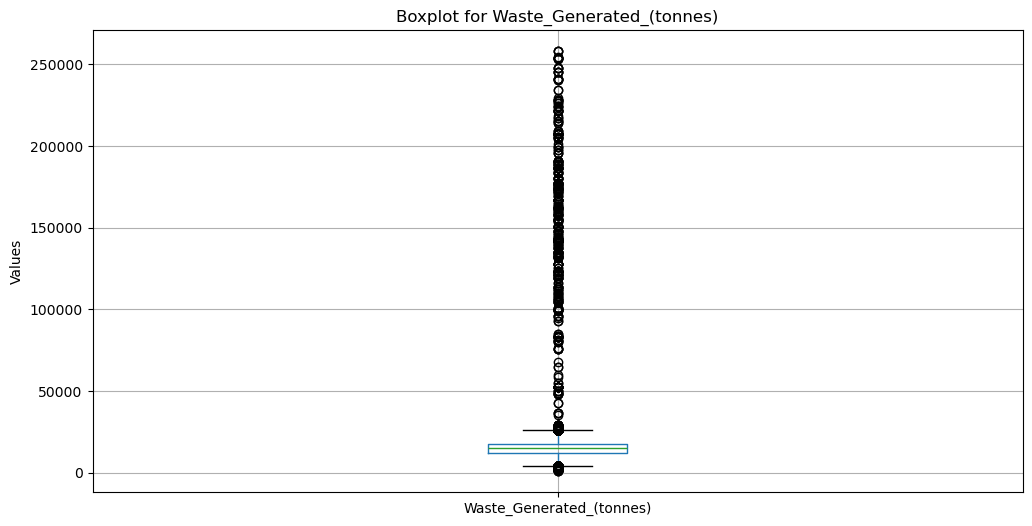

In [370]:
import matplotlib.pyplot as plt
 
numeric_columns = ['Waste_Generated_(tonnes)']
  
plt.figure(figsize=(12, 6))
merged_data[numeric_columns].boxplot()
plt.title('Boxplot for Waste_Generated_(tonnes)')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

For the 'Waste_Treated_(tonnes)' column, large outliers were observed, specifically with values exceeding 1 x 10^{10}. These extreme values were replaced with null values as they were deemed unrealistic. Subsequently, the missing values were addressed using the `interpolate()` function, which performs linear interpolation. This method was applied by grouping the 'Quarter', 'County', and 'Waste_Category' columns, ensuring that the imputation respected the grouping context. The limit_direction parameter was set to 'both', allowing interpolation to fill gaps in both forward and backward directions. This process ensures a smoother dataset while retaining the integrity of the data distribution.

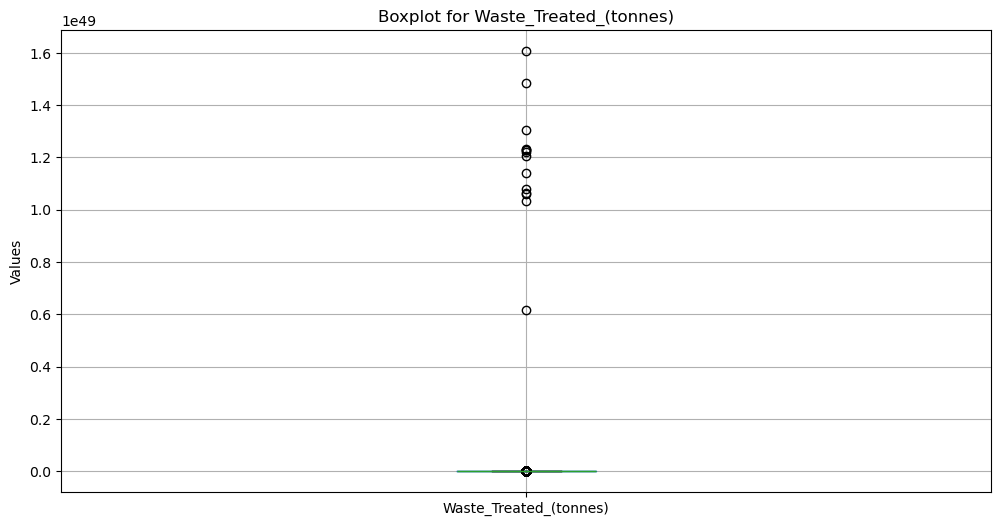

In [372]:
numeric_columns = ['Waste_Treated_(tonnes)']
 
plt.figure(figsize=(12, 6))
merged_data[numeric_columns].boxplot()
plt.title('Boxplot for Waste_Treated_(tonnes)')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

In [373]:

# Replace all values greater than 1e10 in the specified column with NaN
merged_data['Waste_Treated_(tonnes)'] = merged_data['Waste_Treated_(tonnes)'].apply(lambda x: np.nan if x > 1e10 else x)


# Interpolate 'Waste Treated (tonnes)' grouped by 'Quarter', 'County', 'Waste Type', and 'Waste Category'

merged_data['Waste_Treated_(tonnes)'] = merged_data.groupby(['Quarter', 'County', 'Waste_Category'])['Waste_Treated_(tonnes)'].transform(lambda x: x.interpolate(method='linear', limit_direction = 'both'))

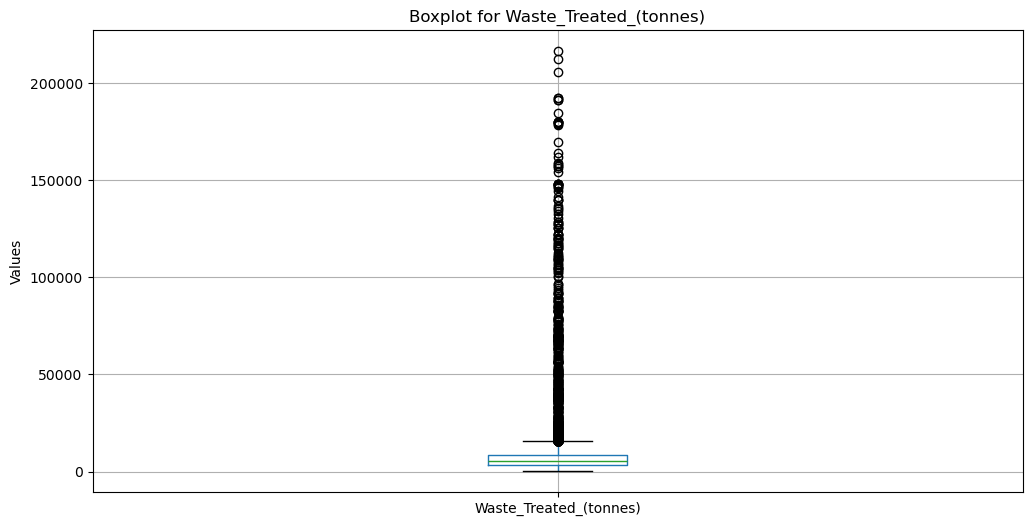

In [374]:
numeric_columns = ['Waste_Treated_(tonnes)']
  
plt.figure(figsize=(12, 6))
merged_data[numeric_columns].boxplot()
plt.title('Boxplot for Waste_Treated_(tonnes)')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

Large outliers are observed in the 'Price_of_Treatment_(euro per tonne)' column, but they are not removed or altered, as they may hold important meaning for the final analysis. Retaining these outliers allows for a more comprehensive understanding of price variations and their potential impact on the overall dataset.

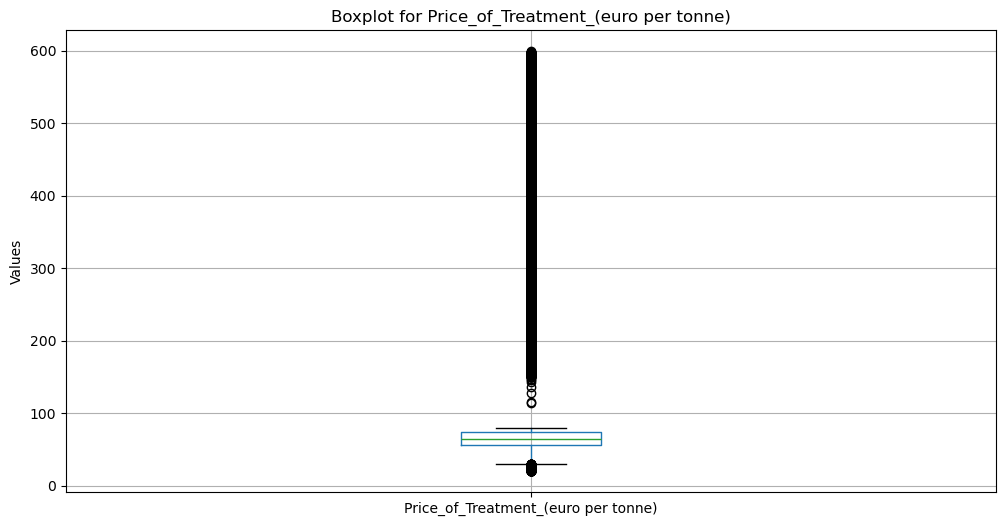

In [376]:
numeric_columns = ['Price_of_Treatment_(euro per tonne)']
 
plt.figure(figsize=(12, 6))
merged_data[numeric_columns].boxplot()
plt.title('Boxplot for Price_of_Treatment_(euro per tonne)')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

The following command is used to check for any remaining missing values in the dataset after handling the missing values and outliers by imputation. This step ensures that all missing values in the numerical columns have been properly addressed, either through interpolation or other imputation methods. By running this check, it is confirmed that no missing values remain, and all numerical data has been handled correctly, ensuring the dataset is complete and ready for further analysis.

In [378]:
merged_data.isnull().sum()

Quarter                                0
Year                                   0
County                                 0
Waste_Type                             0
Waste_Category                         0
Treatment_Type                         0
Treatment_Mode                         0
Waste_Generated_(tonnes)               0
Waste_Treated_(tonnes)                 0
Price_of_Treatment_(euro per tonne)    0
dtype: int64

In [379]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Waste_Generated_(tonnes),55330.0,16062.873402,13338.675982,989.62,12354.3500,15158.18,17773.0000,258000.00
Waste_Treated_(tonnes),55330.0,6891.486327,7678.766378,198.00,3523.4325,5515.91,8427.7275,216552.80
Price_of_Treatment_(euro per tonne),55330.0,90.466779,90.383690,20.00,56.1600,64.92,74.0000,599.45


## Addition of Calculated Columns

Three key metrics were calculated to evaluate waste management performance and cost efficiency. **Treatment Ratio** was derived as the proportion of waste treated to waste generated, indicating treatment effectiveness. **Total Cost** was calculated by multiplying the waste treated by the price of treatment per tonne, providing the overall financial cost. **Cost Efficiency** was measured as the amount of waste treated per euro spent, with higher values indicating more efficient use of funds. These metrics enhance the dataset by offering insights into operational and financial performance.

In [382]:
merged_data['Treatment_Ratio'] = merged_data['Waste_Treated_(tonnes)'] / merged_data['Waste_Generated_(tonnes)']
merged_data['Total_Cost']= merged_data['Waste_Treated_(tonnes)'] * merged_data['Price_of_Treatment_(euro per tonne)']
merged_data['Cost_Efficiency']= merged_data['Waste_Treated_(tonnes)'] / merged_data['Total_Cost']  # higher value means efficient use of funds
merged_data.head()

,Quarter,Year,County,Waste_Type,Waste_Category,Treatment_Type,Treatment_Mode,Waste_Generated_(tonnes),Waste_Treated_(tonnes),Price_of_Treatment_(euro per tonne),Treatment_Ratio,Total_Cost,Cost_Efficiency
0,Q1,2004,Antrim,Non-Hazardous,Agricultural Waste,Recovery,Composting Recovery,10779.94,4311.98,66.70,0.400000,287609.0660,0.014993
1,Q1,2004,Antrim,Non-Hazardous,Agricultural Waste,Disposal,Other,10779.94,2155.99,57.50,0.200000,123969.4250,0.017391
2,Q1,2004,Carlow,Non-Hazardous,Agricultural Waste,Disposal,Landfill,15320.11,6001.94,72.30,0.391769,433940.2620,0.013831
3,Q1,2004,Carlow,Non-Hazardous,Agricultural Waste,Disposal,Other,15320.11,3000.97,30.01,0.195884,90059.1097,0.033322
4,Q1,2004,Cavan,Non-Hazardous,Agricultural Waste,Disposal,Landfill,14205.93,5682.00,68.47,0.399974,389046.5400,0.014605


## Visualisation

The categorical distributions of key variables in the dataset were visualized using bar charts, providing a clear and concise understanding of the data composition. The analysis focused on four main categories: Waste Type, Waste Category, Treatment Type, and Treatment Mode. Each chart displayed the frequency of values within these categories, enabling the identification of trends and dominant features.
The first chart illustrates the distribution of Waste Types, highlighting Non-Hazardous waste as the most prevalent type. The second chart examines the Waste Categories, with Municipal Solid Waste leading in frequency, followed by Industrial Waste, Agricultural Waste, and other waste categories. The third visualization focuses on Treatment Types, showing Disposal as the most commonly employed method for treating waste. Finally, the fourth chart explores Treatment Modes, with Landfill and Recycling being the most frequent modes, followed by other methods.


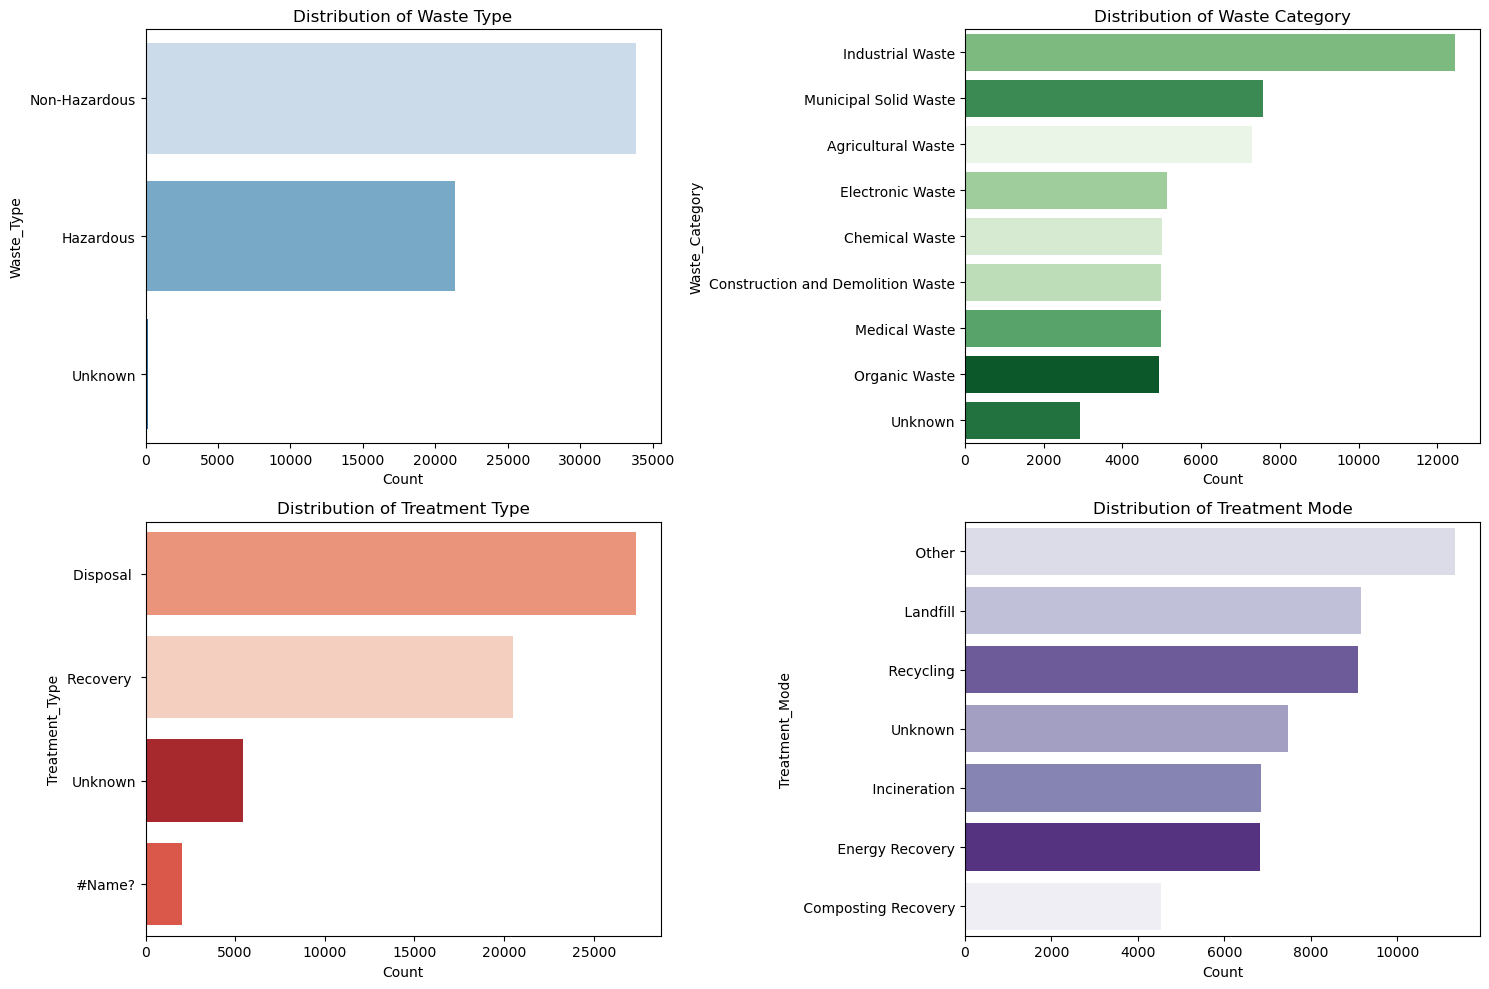

In [385]:
plt.figure(figsize=(15, 10))

# Bar plot for Waste Type
plt.subplot(2, 2, 1)
sns.countplot(y=merged_data['Waste_Type'], order=merged_data['Waste_Type'].value_counts().index, palette='Blues', hue=merged_data['Waste_Type'], legend=False)
plt.title('Distribution of Waste Type')
plt.xlabel('Count')

# Bar plot for Waste Category
plt.subplot(2, 2, 2)
sns.countplot(y=merged_data['Waste_Category'], order=merged_data['Waste_Category'].value_counts().index, palette='Greens', hue=merged_data['Waste_Category'], legend=False)
plt.title('Distribution of Waste Category')
plt.xlabel('Count')

# Bar plot for Treatment Type
plt.subplot(2, 2, 3)
sns.countplot(y=merged_data['Treatment_Type'], order=merged_data['Treatment_Type'].value_counts().index, palette='Reds', hue=merged_data['Treatment_Type'], legend=False)
plt.title('Distribution of Treatment Type')
plt.xlabel('Count')

# Bar plot for Treatment Mode
plt.subplot(2, 2, 4)
sns.countplot(y=merged_data['Treatment_Mode'].dropna(), order=merged_data['Treatment_Mode'].value_counts().index, palette='Purples', hue=merged_data['Treatment_Mode'].dropna(), legend=False)
plt.title('Distribution of Treatment Mode')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

The pie chart represents the proportion of waste generated by each waste category, highlighting the significant contributors to overall waste generation. The data is aggregated by waste category, and only categories contributing more than 2% of the total waste are considered for simplicity and clarity. The chart uses distinct colors for each segment, making it visually appealing and easy to differentiate between categories. The largest category is emphasized by slightly separating its slice from the rest. A legend is positioned alongside the chart, providing clear labels for each segment. This visualization effectively conveys the distribution of waste across categories, drawing attention to dominant types of waste while ensuring smaller contributors are not overlooked. It is a valuable tool for identifying key areas for waste management interventions.
From this pie chart, it is observed that Industrial Waste is the largest contributor with 22.0%, followed by Muncipal Solid Waste with 14.1%.

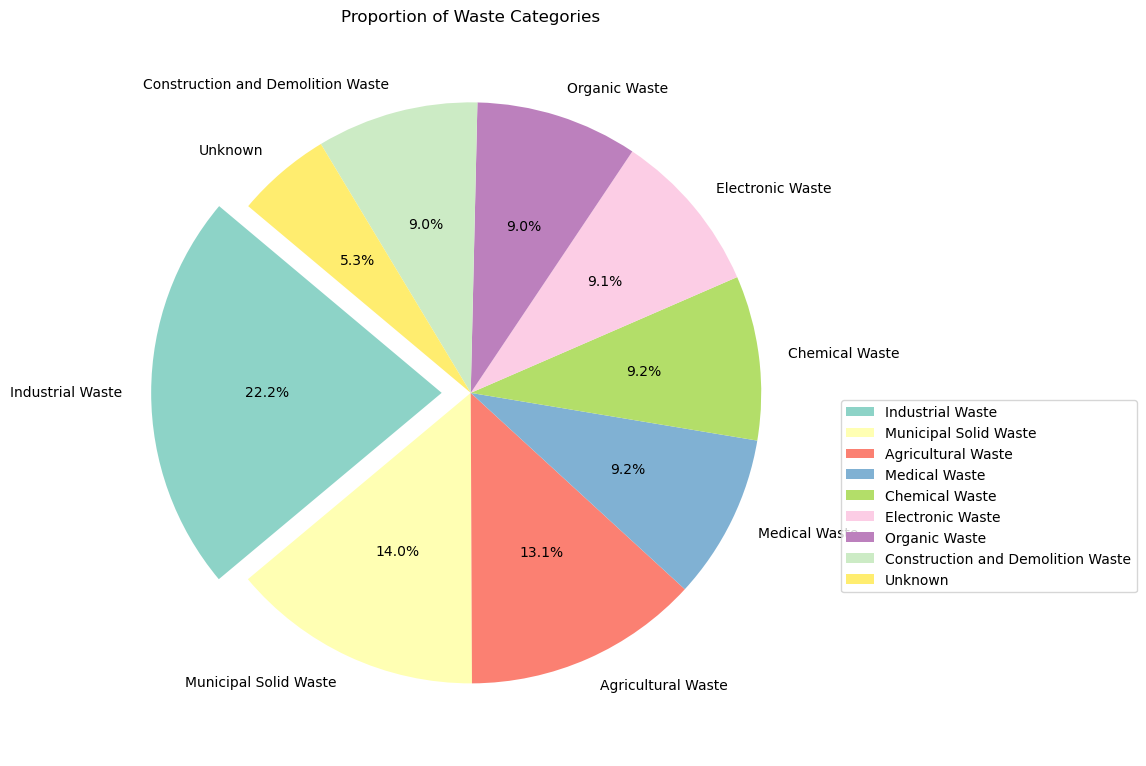

In [387]:
# Aggregate waste generated by Waste_Category
waste_category_data = merged_data.groupby('Waste_Category')['Waste_Generated_(tonnes)'].sum()

# Combine small categories into 'Others'
threshold = 0.02 * waste_category_data.sum()  # Categories contributing less than 2%
waste_category_data = waste_category_data.sort_values(ascending=False)
waste_category_data = waste_category_data[waste_category_data >= threshold]

# Plot the updated pie chart
plt.figure(figsize=(10, 8))
waste_category_data.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colormap='Set3', 
    explode=[0.1 if i == 0 else 0 for i in range(len(waste_category_data))]
)
plt.title('Proportion of Waste Categories')
plt.ylabel('')
plt.legend(waste_category_data.index, bbox_to_anchor=(1, 0.5), loc="best")
plt.tight_layout()
plt.show()

The bar chart illustrates the total waste treated by each treatment mode, highlighting the various waste management practices. Recycling emerges as the most utilized treatment mode, closely followed by incineration, indicating their dominant roles in waste processing. On the other end of the spectrum, energy recovery is the least utilized treatment mode, reflecting its limited contribution compared to other methods. This visualization offers valuable insights into the efficiency and reliance on different treatment approaches, emphasizing the significant contributions of recycling and incineration in managing waste effectively..


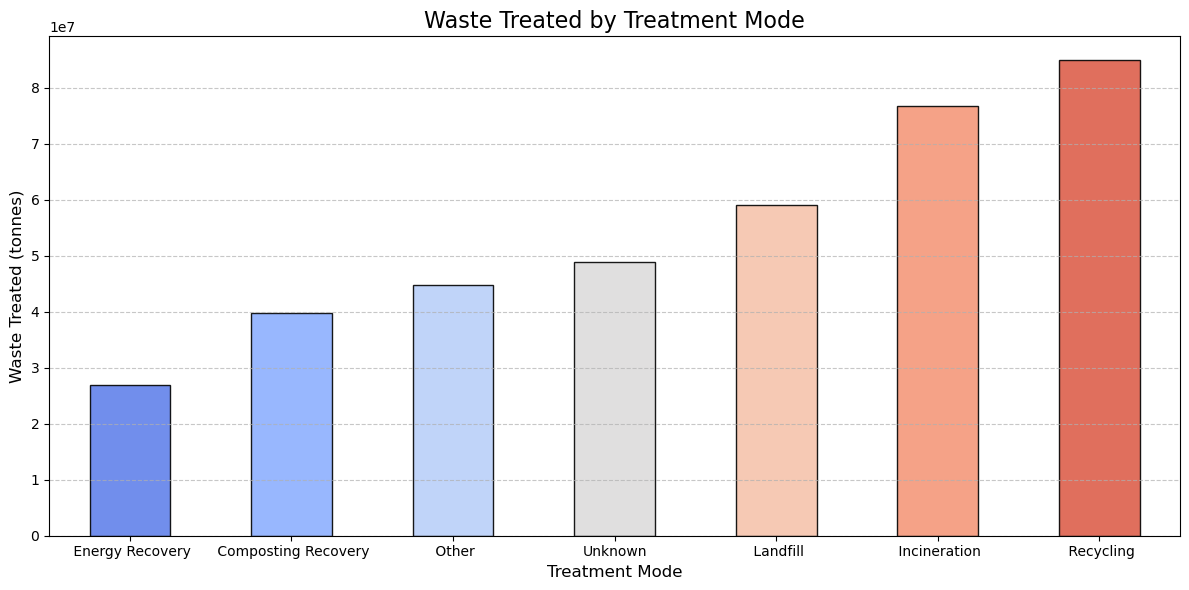

In [389]:
# Aggregate waste treated by Treatment_Mode
treatment_mode_data = merged_data.groupby('Treatment_Mode')['Waste_Treated_(tonnes)'].sum()

# Generate a color palette
colors = sns.color_palette("coolwarm", len(treatment_mode_data))

# Plot the bar chart with custom colors
plt.figure(figsize=(12, 6))
treatment_mode_data.sort_values().plot(kind='bar', color=colors, edgecolor='black', alpha=0.9)
plt.title('Waste Treated by Treatment Mode', fontsize=16)
plt.ylabel('Waste Treated (tonnes)', fontsize=12)
plt.xlabel('Treatment Mode', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The line chart depicts the fluctuations in the Average Treatment Ratio over several years, highlighting periods of efficiency and inefficiency in waste treatment relative to the total waste generated. The treatment ratio remains relatively stable between 0.46 and 0.53 for most years, with some notable fluctuations. Peaks in the ratio are observed in 2007, 2014, and 2019, indicating periods of improved waste treatment efficiency. Conversely, significant dips occur in 2005, 2012, and 2021, suggesting challenges or inefficiencies during those years.


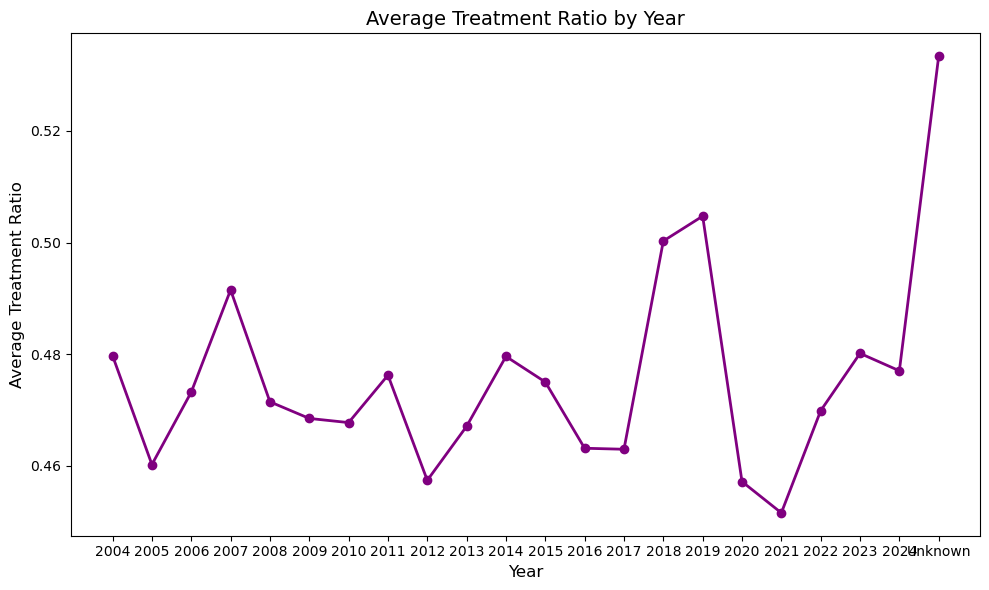

In [391]:
# Line Plot of Treatment Ratio by Year
avg_treatment_ratio_year = merged_data.groupby('Year')['Treatment_Ratio'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_treatment_ratio_year, color='purple', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Average Treatment Ratio by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Treatment Ratio', fontsize=12)
plt.tight_layout()
plt.show()


The bar chart presents the average treatment ratio for each treatment mode, offering insights into the effectiveness of various waste treatment practices. Incineration stands out with the highest average treatment ratio, reflecting its efficiency in processing waste, followed closely by compost recovery, which also demonstrates notable performance. This chart effectively highlights the comparative efficiency of treatment modes, emphasizing the significant contributions of incineration and compost recovery to effective waste management strategies.

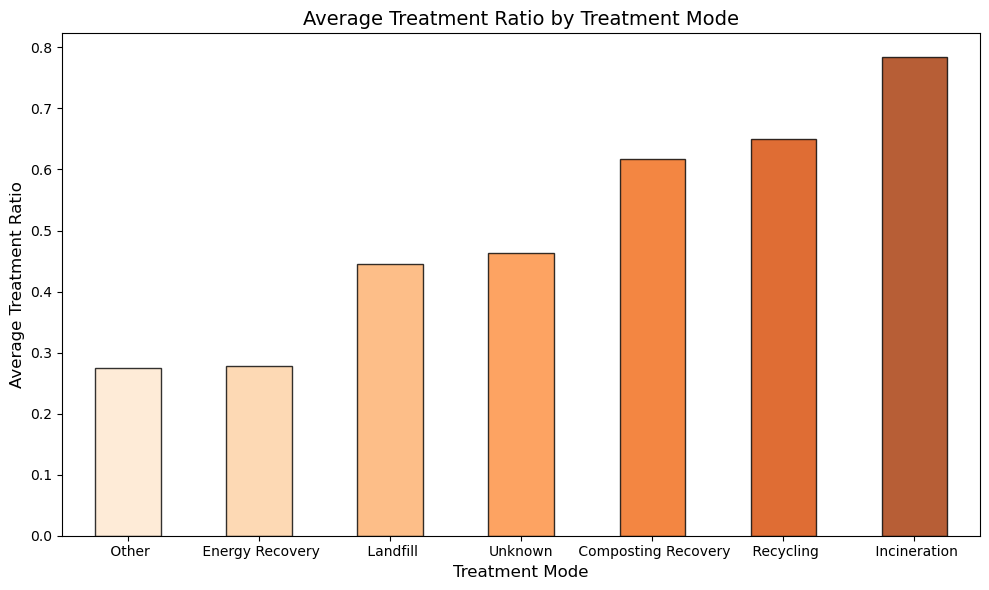

In [393]:
# Bar plot for average Treatment Ratio by Treatment Mode
avg_treatment_ratio_mode = merged_data.groupby('Treatment_Mode')['Treatment_Ratio'].mean().sort_values()
colors = sns.color_palette("Oranges", len(treatment_mode_data))

plt.figure(figsize=(10, 6))
avg_treatment_ratio_mode.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8)
plt.title('Average Treatment Ratio by Treatment Mode', fontsize=14)
plt.xlabel('Treatment Mode', fontsize=12)
plt.ylabel('Average Treatment Ratio', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


This visualization analyzes yearly trends in waste generation, waste treatment, and treatment costs using a combined bar and line chart. Data was aggregated by year, calculating the total waste generated and treated and the average treatment cost. The amount of waste generated remains relatively stable throughout most years but shows a significant spike in 2024, suggesting an unusual increase in waste production. In contrast, the waste treated remains consistently lower than the waste generated. The total cost of treatment fluctuates noticeably across the years, with peaks in 2011,2018, 2019, and 2022. Interestingly, the treatment costs do not appear to directly correlate with the amount of waste treated, suggesting external factors or inefficiencies driving costs. 


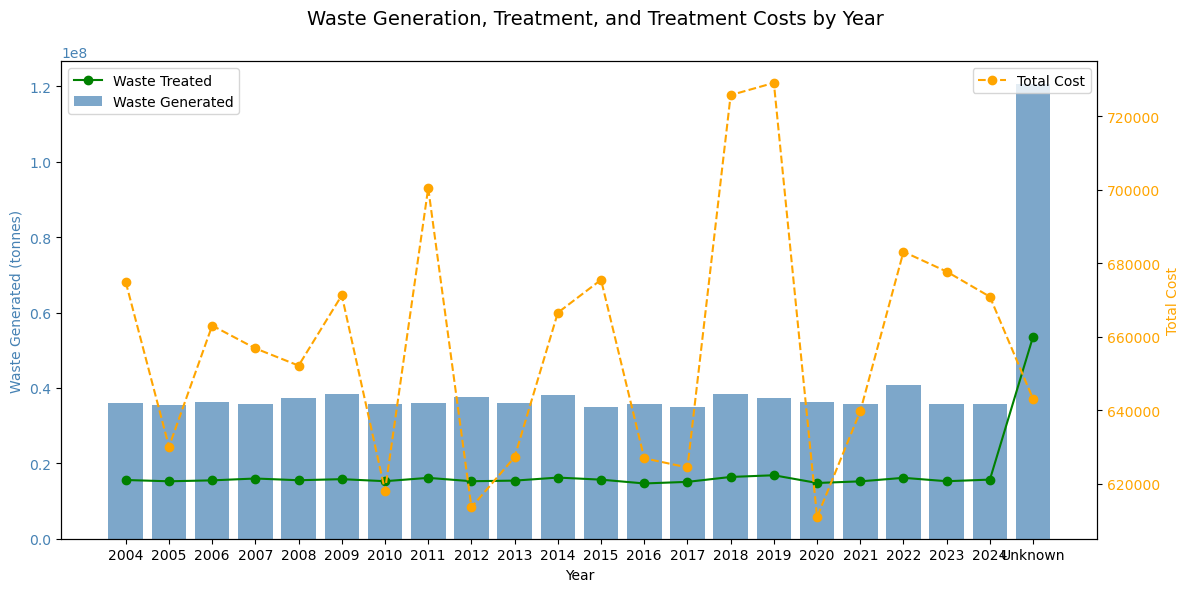

In [395]:
# Aggregate data by Year
yearly_data = merged_data.groupby('Year').agg({
    'Waste_Generated_(tonnes)': 'sum',
    'Waste_Treated_(tonnes)': 'sum',
    'Total_Cost': 'mean'  # Average price per year
}).reset_index()

# Create the combined bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Waste Generated
ax1.bar(yearly_data['Year'], yearly_data['Waste_Generated_(tonnes)'], color='steelblue', alpha=0.7, label='Waste Generated')
ax1.set_xlabel('Year')
ax1.set_ylabel('Waste Generated (tonnes)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Line chart for Waste Treated
ax1.plot(yearly_data['Year'], yearly_data['Waste_Treated_(tonnes)'], color='green', marker='o', label='Waste Treated')

# Secondary y-axis for Price of Treatment
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Total_Cost'], color='orange', marker='o', linestyle='--', label='Total Cost')
ax2.set_ylabel('Total Cost', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
fig.suptitle('Waste Generation, Treatment, and Treatment Costs by Year', fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()


The chart shows the trend in cost efficiency from 2004 to 2024. The data indicates fluctuations in cost efficiency over the two-decade period. The values show noticeable peaks in certain years, such as 2005, 2010,  2012, and 2017, suggesting periods of improved efficiency. There are also sharp declines, particularly in years like 2009, 2014, and 2023, signaling dips in efficiency. The year 2024 ends on a slightly upward trend. Overall, the chart captures an inconsistent but cyclical pattern in cost efficiency over time.



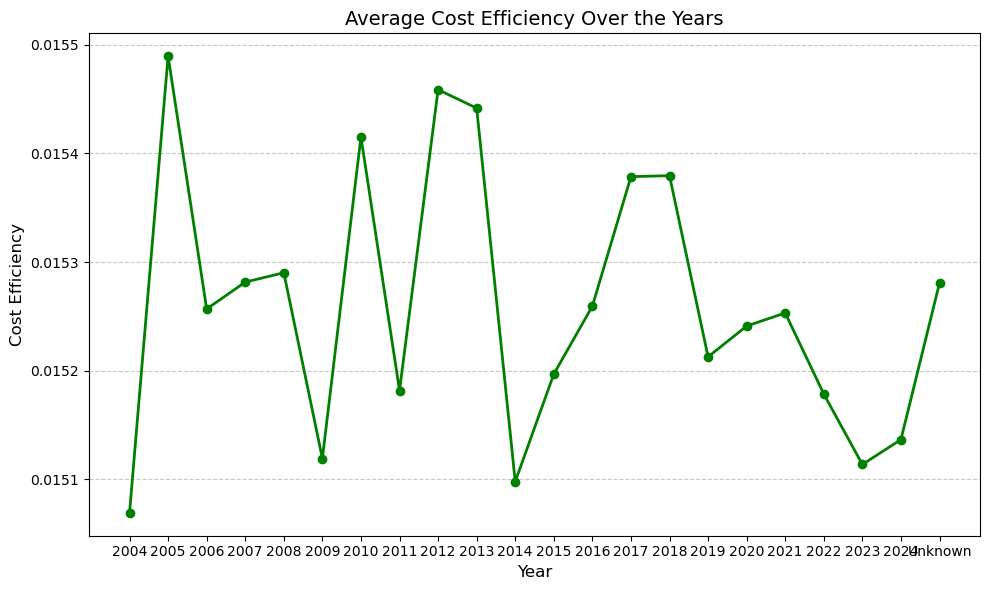

In [397]:
# Calculate average Cost Efficiency by Year
yearly_cost_efficiency = merged_data.groupby('Year')['Cost_Efficiency'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_cost_efficiency.index, yearly_cost_efficiency.values, marker='o', color='green', linewidth=2)
plt.title('Average Cost Efficiency Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cost Efficiency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## References

Pandas. (2014). User Guide — pandas 1.0.1 documentation. Pydata.org. Retrieved November 27, 2024, from https://pandas.pydata.org/docs/user_guide/index.html <br>

NumPy. (2022). NumPy: The absolute basics for beginners — NumPy v1.20 Manual. Numpy.org. Retrieved November 27, 2024, from https://numpy.org/doc/stable/user/absolute_beginners.html <br>

Matplotlib. (n.d.). Matplotlib: Python plotting — Matplotlib 3.3.4 documentation. Matplotlib.org. Retrieved November 27, 2024, from https://matplotlib.org/stable/index.html <br>

Waskom, M. (n.d.). An introduction to seaborn — seaborn 0.12.1 documentation. Seaborn.pydata.org. Retrieved November 27, 2024, from https://seaborn.pydata.org/tutorial/introduction.html <br>

Python for Data Analysis: Data wrangling with pandas, NumPy, and Jupyter (3rd ed.). (2022). O'Reilly Media. Retrieved November 27, 2024, from https://www.oreilly.com/library/view/python-for-data/9781098104023/ <br> 

Sahoo, K., Samal, A. K., Pramanik, J., & Pani, S. K. (2019). Exploratory data analysis using Python. International Journal of Innovative Technology and Exploring Engineering, 8(12), 4727–4735. https://doi.org/10.35940/ijitee.l3591.1081219 <br>

ivanleoncz. (2020, July 14). How to remove \xa0 from string in Python? Stack Overflow. Retrieved November 27, 2024, from https://stackoverflow.com/questions/10993612/how-to-remove-xa0-from-string-in-python <br>

What strategies can you employ to handle missing data with pandas groupby? (2024). Linkedin.com. Retrieved November 27, 2024, from https://www.linkedin.com/advice/0/what-strategies-can-you-employ-handle-missing-data-9lepc <br>

Cao, W. (2021). Discussion on mean, median, mode and its validity and table number. Journal of Contemporary Educational Research, 5(3). https://doi.org/10.26689/jcer.v5i3.1949 <br>

Khorana, A., Pareek, A., Ollivier, M., Madjarova, S. J., Kunze, K. N., Nwachukwu, B. U., Karlsson, J., Marigi, E. M., & Williams, R. J. (2022). Choosing the appropriate measure of central tendency: Mean, median, or mode? Knee Surgery, Sports Traumatology, Arthroscopy, 31(1). https://doi.org/10.1007/s00167-022-07204-y <br>

Aguinis, H., Gottfredson, R. K., & Joo, H. (2013). Best-practice recommendations for defining, identifying, and handling outliers. Organizational Research Methods, 16(2), 270–301. https://doi.org/10.1177/1094428112470848 <br>

Sullivan, J. H., Warkentin, M., & Wallace, L. (2021). So many ways for assessing outliers: What really works and does it matter? Journal of Business Research, 132(1), 530–543. https://doi.org/10.1016/j.jbusres.2021.03.066 <br>

### Contributions

Sajin Siyad 			      - Initial Analysis, Data cleaning and Processing, Handling outliers, Data preperation, Visualisation  <br>
Chinmayi Budanur Siddaramaiah - Initial Analysis, Data cleaning and Processing, Handling outliers, Data preperation, Visualisation   <br>
Hanna Mariyam Jacob           - Initial Analysis, Data cleaning and Processing, Handling outliers, Data preperation, Visualisation   <br>
Edwin Dominic Joseph          - Initial Analysis, Visualisation, Code analysis   <br>
Aditya Gusain                 - Initital Analysis    <br>



**As a group, a sentence describing:** <br>
o The most enjoyable part of the project <br>
  The most enjoyable part of the project was definitely our collaboration, knowledge sharing and finding each others SILLY errors! <br>
o The most challenging aspect of the project <br>
  Finding time inspite of having a busy schedule. Understanding complex logics. <br>
o The most valuable thing we learned through this project <br>
  Importance of team collaboration and proper tools to manage collaboration.